In [1]:
import numpy as np
import matplotlib.pyplot as plt
# 引入 支持向量机 Classify
# 支持向量机是一类按监督学习方式对数据进行二元分类的广义线性分类器
from sklearn.svm import LinearSVC
# 引入数据集
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
iris = datasets.load_iris()

x = iris.data[:,(2,3)]
y = (iris.target == 2).astype(np.float64)

svm_clf = Pipeline((
    ('std',StandardScaler()),
    ('linear_svc',LinearSVC(C=1))
))

svm_clf.fit(x,y)

Pipeline(steps=[('std', StandardScaler()), ('linear_svc', LinearSVC(C=1))])

In [3]:
svm_clf.predict([[5.5,1.7],[1.5,0.2]])

array([1., 0.])

In [4]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1)
scaled_svm_clf1 = Pipeline((
    ('std',scaler),
    ('linear_svc',svm_clf1)
))

svm_clf2 = LinearSVC(C=100)
scaled_svm_clf2 = Pipeline((
    ('std',scaler),
    ('linear_svc',svm_clf2)
))

scaled_svm_clf1.fit(x,y)
scaled_svm_clf2.fit(x,y)

d:\python3.8\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('std', StandardScaler()), ('linear_svc', LinearSVC(C=100))])

In [5]:
# b
b1 = svm_clf1.decision_function([ -scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([ -scaler.mean_ / scaler.scale_])
# w
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_

svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

In [6]:
def plot_svc_bd(svm_clf,start,end,sv=True):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    x0 = np.linspace(start,end,200)
    #决策边界绘制
    decision_bd = -w[0]/w[1]*x0 -b/w[1]
    margin = 1/w[1]
    up = decision_bd + margin
    down = decision_bd - margin
    plt.plot(x0,decision_bd,'k-',linewidth=2)
    plt.plot(x0,up,'k--',linewidth=2)
    plt.plot(x0,down,'k--',linewidth=2)


    if(sv == True):
        svs = svm_clf.support_vectors_
        plt.scatter(svs[:,0],svs[:,1],s=180,facecolors='#FAA')

(4.0, 6.0, 0.8, 2.8)

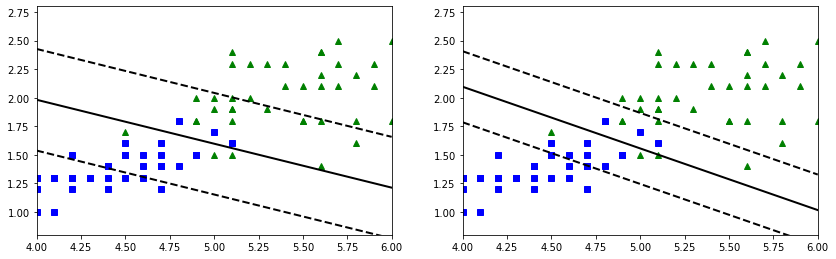

In [7]:
plt.figure(figsize=(14,4.2))
plt.subplot(121)

# 绘制数据
plt.plot(x[:, 0][y==1], x[:,1][y==1],'g^')
plt.plot(x[:, 0][y==0], x[:,1][y==0],'bs')

#绘制决策边界
plot_svc_bd(svm_clf1,4,6,False)
plt.axis([4,6,0.8,2.8])

plt.subplot(122)

# 绘制数据
plt.plot(x[:, 0][y==1], x[:,1][y==1],'g^')
plt.plot(x[:, 0][y==0], x[:,1][y==0],'bs')

#绘制决策边界
plot_svc_bd(svm_clf2,4,6,False)
plt.axis([4,6,0.8,2.8])
